In [ ]:
#importing necessary libraries
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#loading mnist dataset

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("training images = ", train_images.shape, "training labels = ", train_labels.shape)
print("testing images = ", test_images.shape, "testing labels = ", test_labels.shape)

11490434/11490434 [==============================] - 0s 0us/step
training images =  (60000, 28, 28) training labels =  (60000,)
testing images =  (10000, 28, 28) testing labels =  (10000,)


In [ ]:
train_images[59999]  #displaying sample input data from training set

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  38,  48,  48,  22,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         62,  97, 198, 243, 254, 254, 212,  27,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  67,
        172, 254, 254, 225, 218, 218, 237, 248,  40,   0,  21, 164, 187,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  89, 219,
        254,  97,  67,  14,   0,   0,  92, 231, 122,  23, 203, 236,  59,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 217, 242,
         92,   4,   0,   0,   0,   0,   4, 147, 253, 240, 232,  92,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 101, 255,  92,
          0,   0,   0,   0,   0,   0, 105, 254, 254, 177,  11,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 167, 244,  41,
          0,   0,   0,   7,  76, 199, 238, 239,  94,  10,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 192, 121,   0,
          0,   2,  63, 180, 254, 233, 126,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 190, 196,  14,
          2,  97, 254, 252, 146,  52,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 130, 225,  71,
        180, 232, 181,  60,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 130, 254, 254,
        230,  46,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   6,  77, 244, 254, 162,
          4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 110, 254, 218, 254, 116,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 131, 254, 154,  28, 213,  86,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  66, 209, 153,  19,  19, 233,  60,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 142, 254, 165,   0,  14, 216, 167,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  90, 254, 175,   0,  18, 229,  92,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  26, 229, 249, 176, 222, 244,  44,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
train_labels[59999]  #displaying sample output data(label) from training set

8

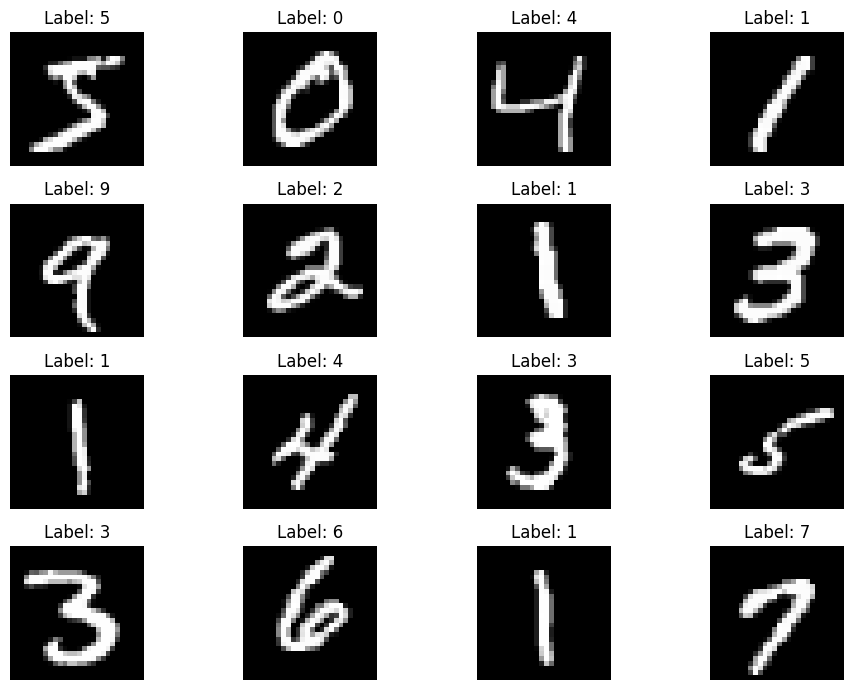

In [ ]:
plt.figure(figsize=(10, 7))   #displaying images with labels from train set images

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
test_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  84, 185, 159, 151,  60,  36,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 222, 254, 254, 254, 254, 241, 198,
        198, 198, 198, 198, 198, 198, 198, 170,  52,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  67, 114,  72, 114, 163, 227, 254,
        225, 254, 254, 254, 250, 229, 254, 254, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  17,  66,
         14,  67,  67,  67,  59,  21, 236, 254, 106,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  83, 253, 209,  18,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  22, 233, 255,  83,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 129, 254, 238,  44,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  59, 249, 254,  62,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 133, 254, 187,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   9, 205, 248,  58,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 126, 254, 182,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  75, 251, 240,  57,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         19, 221, 254, 166,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        203, 254, 219,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
        254, 254,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 224,
        254, 115,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 254,
        254,  52,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
from sklearn.model_selection import train_test_split

# Reshape images to have a single channel
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Split the data into training and testing sets

#80:20 split
train_images, test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

print("Training images:", train_images.shape)
print("Training labels:", train_labels.shape)
print("Testing images:", test_images.shape)
print("Testing labels:", test_labels.shape)



Training images: (48000, 28, 28, 1)
Training labels: (48000,)
Testing images: (12000, 28, 28, 1)
Testing labels: (12000,)


In [ ]:
train_images[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#gradient boosting
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Initialize models
logistic_regression = LogisticRegression(max_iter=1000)
svm_classifier = SVC()
random_forest = RandomForestClassifier()
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()
xgb = XGBClassifier()
naive_bayes = GaussianNB()

# Fit the models
logistic_regression.fit(train_images.reshape((train_images.shape[0], -1)), train_labels)
svm_classifier.fit(train_images.reshape((train_images.shape[0], -1)), train_labels)
random_forest.fit(train_images.reshape((train_images.shape[0], -1)), train_labels)
knn.fit(train_images.reshape((train_images.shape[0], -1)), train_labels)
decision_tree.fit(train_images.reshape((train_images.shape[0], -1)), train_labels)
xgb.fit(train_images.reshape((train_images.shape[0], -1)), train_labels)
naive_bayes.fit(train_images.reshape((train_images.shape[0], -1)), train_labels)

# Predictions
logistic_regression_pred = logistic_regression.predict(test_images.reshape((test_images.shape[0], -1)))
svm_pred = svm_classifier.predict(test_images.reshape((test_images.shape[0], -1)))
random_forest_pred = random_forest.predict(test_images.reshape((test_images.shape[0], -1)))
knn_pred = knn.predict(test_images.reshape((test_images.shape[0], -1)))
decision_tree_pred = decision_tree.predict(test_images.reshape((test_images.shape[0], -1)))
xgb_pred = xgb.predict(test_images.reshape((test_images.shape[0], -1)))
naive_bayes_pred = naive_bayes.predict(test_images.reshape((test_images.shape[0], -1)))

# Accuracy
logistic_regression_accuracy = accuracy_score(test_labels, logistic_regression_pred)
svm_accuracy = accuracy_score(test_labels, svm_pred)
random_forest_accuracy = accuracy_score(test_labels, random_forest_pred)
knn_accuracy = accuracy_score(test_labels, knn_pred)
decision_tree_accuracy = accuracy_score(test_labels, decision_tree_pred)
xgb_accuracy = accuracy_score(test_labels, xgb_pred)
naive_bayes_accuracy = accuracy_score(test_labels, naive_bayes_pred)

print("Logistic Regression Accuracy:", logistic_regression_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)
print("knn Accuracy:", knn_accuracy)
print("decision_tree Accuracy:", decision_tree_accuracy)
print("xgb Accuracy:", xgb_accuracy)
print("naive_bayes Accuracy:", naive_bayes_accuracy)

Logistic Regression Accuracy: 0.9224166666666667
SVM Accuracy: 0.9775833333333334
Random Forest Accuracy: 0.9675833333333334
knn Accuracy: 0.9715
decision_tree Accuracy: 0.8675833333333334
xgb Accuracy: 0.977
naive_bayes Accuracy: 0.5600833333333334


 For, **80:20 split**, As can be seen from above results, SVM has shown best accuracy as compared to other models.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Function to print metrics and confusion matrix
def print_evaluation_metrics(y_true, y_pred, model_name):
    print("Evaluation metrics for", model_name)
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix for", model_name)
    print(confusion_matrix(y_true, y_pred))
    print("\n")

# Logistic Regression
print_evaluation_metrics(test_labels, logistic_regression_pred, "Logistic Regression")

# SVM
print_evaluation_metrics(test_labels, svm_pred, "SVM")

# Random Forest
print_evaluation_metrics(test_labels, random_forest_pred, "Random Forest")

#knn
print_evaluation_metrics(test_labels, knn_pred, "K-Nearest Neighbors")

#decision
print_evaluation_metrics(test_labels, decision_tree_pred, "Decision Trees")

#gradient boosting
print_evaluation_metrics(test_labels, xgb_pred, "XGBoost")

#naive bayes
print_evaluation_metrics(test_labels, naive_bayes_pred, "Naive Bayes")

Evaluation metrics for Logistic Regression
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1175
           1       0.95      0.97      0.96      1322
           2       0.90      0.90      0.90      1174
           3       0.91      0.89      0.90      1219
           4       0.93      0.94      0.94      1176
           5       0.89      0.88      0.89      1104
           6       0.95      0.95      0.95      1177
           7       0.94      0.93      0.93      1299
           8       0.90      0.87      0.88      1160
           9       0.90      0.91      0.91      1194

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000

Confusion Matrix for Logistic Regression
[[1138    0    7    1    3    7    7    4    6    2]
 [   0 1281   10    3    2    5    1    3   14    3]
 [   3   19 1052   16   14    7   17   16   24    6

For, 80:20 split, As can be seen from above results, SVM, Random Forest, XGBoost, and K-Nearest Neighbors demonstrate high accuracy, precision, recall, and F1-score across multiple classes, indicating strong overall performance.
Naive Bayes, however, exhibits comparatively lower performance across most metrics, especially precision, recall, and F1-score for several classes

In [ ]:
#50:50 split
train_images, test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size=0.5, random_state=42)

print("Training images:", train_images.shape)
print("Training labels:", train_labels.shape)
print("Testing images:", test_images.shape)
print("Testing labels:", test_labels.shape)

Training images: (24000, 28, 28)
Training labels: (24000,)
Testing images: (24000, 28, 28)
Testing labels: (24000,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#gradient boosting
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Initialize models
logistic_regression = LogisticRegression(max_iter=1000)
svm_classifier = SVC()
random_forest = RandomForestClassifier()
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()
xgb = XGBClassifier()
naive_bayes = GaussianNB()

# Fit the models


logistic_regression.fit(train_images.reshape((train_images.shape[0], -1)), train_labels)
svm_classifier.fit(train_images.reshape((train_images.shape[0], -1)), train_labels)
random_forest.fit(train_images.reshape((train_images.shape[0], -1)), train_labels)
knn.fit(train_images.reshape((train_images.shape[0], -1)), train_labels)
decision_tree.fit(train_images.reshape((train_images.shape[0], -1)), train_labels)
xgb.fit(train_images.reshape((train_images.shape[0], -1)), train_labels)
naive_bayes.fit(train_images.reshape((train_images.shape[0], -1)), train_labels)

# Predictions
logistic_regression_pred = logistic_regression.predict(test_images.reshape((test_images.shape[0], -1)))
svm_pred = svm_classifier.predict(test_images.reshape((test_images.shape[0], -1)))
random_forest_pred = random_forest.predict(test_images.reshape((test_images.shape[0], -1)))
knn_pred = knn.predict(test_images.reshape((test_images.shape[0], -1)))
decision_tree_pred = decision_tree.predict(test_images.reshape((test_images.shape[0], -1)))
xgb_pred = xgb.predict(test_images.reshape((test_images.shape[0], -1)))
naive_bayes_pred = naive_bayes.predict(test_images.reshape((test_images.shape[0], -1)))

# Accuracy
logistic_regression_accuracy = accuracy_score(test_labels, logistic_regression_pred)
svm_accuracy = accuracy_score(test_labels, svm_pred)
random_forest_accuracy = accuracy_score(test_labels, random_forest_pred)
knn_accuracy = accuracy_score(test_labels, knn_pred)
decision_tree_accuracy = accuracy_score(test_labels, decision_tree_pred)
xgb_accuracy = accuracy_score(test_labels, xgb_pred)
naive_bayes_accuracy = accuracy_score(test_labels, naive_bayes_pred)

print("Logistic Regression Accuracy:", logistic_regression_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)
print("knn Accuracy:", knn_accuracy)
print("decision_tree Accuracy:", decision_tree_accuracy)
print("xgb Accuracy:", xgb_accuracy)
print("naive_bayes Accuracy:", naive_bayes_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.881625
SVM Accuracy: 0.9715416666666666
Random Forest Accuracy: 0.96
knn Accuracy: 0.963375
decision_tree Accuracy: 0.8441666666666666
xgb Accuracy: 0.9695833333333334
naive_bayes Accuracy: 0.5627083333333334


For, **50:50 split**, As can be seen from above results, SVM has shown best accuracy as compared to other models.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Function to print metrics and confusion matrix
def print_evaluation_metrics(y_true, y_pred, model_name):
    print("Evaluation metrics for", model_name)
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix for", model_name)
    print(confusion_matrix(y_true, y_pred))
    print("\n")

# Logistic Regression
print_evaluation_metrics(test_labels, logistic_regression_pred, "Logistic Regression")

# SVM
print_evaluation_metrics(test_labels, svm_pred, "SVM")

# Random Forest
print_evaluation_metrics(test_labels, random_forest_pred, "Random Forest")

#knn
print_evaluation_metrics(test_labels, knn_pred, "K-Nearest Neighbors")

#decision
print_evaluation_metrics(test_labels, decision_tree_pred, "Decision Trees")

#gradient boosting
print_evaluation_metrics(test_labels, xgb_pred, "XGBoost")

#naive bayes
print_evaluation_metrics(test_labels, naive_bayes_pred, "Naive Bayes")

Evaluation metrics for Logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2293
           1       0.94      0.95      0.95      2705
           2       0.87      0.85      0.86      2436
           3       0.87      0.85      0.86      2533
           4       0.88      0.89      0.88      2328
           5       0.84      0.83      0.83      2131
           6       0.91      0.91      0.91      2348
           7       0.90      0.90      0.90      2485
           8       0.83      0.83      0.83      2344
           9       0.84      0.86      0.85      2397

    accuracy                           0.88     24000
   macro avg       0.88      0.88      0.88     24000
weighted avg       0.88      0.88      0.88     24000

Confusion Matrix for Logistic Regression
[[2141    1   30   10    6   41   21    8   21   14]
 [   0 2580   19   16    4   10    7   13   45   11]
 [  30   41 2068   69   32   20   40   43   77   16

For, 50:50 split, As can be seen from above results,  SVM and XGBoost demonstrate the highest accuracies at 97%, showcasing their effectiveness in classification tasks. Conversely, Naive Bayes lags with 56% accuracy, suggesting limitations in handling complex data patterns.

In [ ]:
#20:80 split
train_images, test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size=0.8, random_state=42)

print("Training images:", train_images.shape)
print("Training labels:", train_labels.shape)
print("Testing images:", test_images.shape)
print("Testing labels:", test_labels.shape)

Training images: (4800, 28, 28)
Training labels: (4800,)
Testing images: (19200, 28, 28)
Testing labels: (19200,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#gradient boosting
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Initialize models
logistic_regression = LogisticRegression(max_iter=1000)
svm_classifier = SVC()
random_forest = RandomForestClassifier()
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()
xgb = XGBClassifier()
naive_bayes = GaussianNB()

# Fit the models


logistic_regression.fit(train_images.reshape((train_images.shape[0], -1)), train_labels)
svm_classifier.fit(train_images.reshape((train_images.shape[0], -1)), train_labels)
random_forest.fit(train_images.reshape((train_images.shape[0], -1)), train_labels)
knn.fit(train_images.reshape((train_images.shape[0], -1)), train_labels)
decision_tree.fit(train_images.reshape((train_images.shape[0], -1)), train_labels)
xgb.fit(train_images.reshape((train_images.shape[0], -1)), train_labels)
naive_bayes.fit(train_images.reshape((train_images.shape[0], -1)), train_labels)

# Predictions
logistic_regression_pred = logistic_regression.predict(test_images.reshape((test_images.shape[0], -1)))
svm_pred = svm_classifier.predict(test_images.reshape((test_images.shape[0], -1)))
random_forest_pred = random_forest.predict(test_images.reshape((test_images.shape[0], -1)))
knn_pred = knn.predict(test_images.reshape((test_images.shape[0], -1)))
decision_tree_pred = decision_tree.predict(test_images.reshape((test_images.shape[0], -1)))
xgb_pred = xgb.predict(test_images.reshape((test_images.shape[0], -1)))
naive_bayes_pred = naive_bayes.predict(test_images.reshape((test_images.shape[0], -1)))

# Accuracy
logistic_regression_accuracy = accuracy_score(test_labels, logistic_regression_pred)
svm_accuracy = accuracy_score(test_labels, svm_pred)
random_forest_accuracy = accuracy_score(test_labels, random_forest_pred)
knn_accuracy = accuracy_score(test_labels, knn_pred)
decision_tree_accuracy = accuracy_score(test_labels, decision_tree_pred)
xgb_accuracy = accuracy_score(test_labels, xgb_pred)
naive_bayes_accuracy = accuracy_score(test_labels, naive_bayes_pred)

print("Logistic Regression Accuracy:", logistic_regression_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)
print("knn Accuracy:", knn_accuracy)
print("decision_tree Accuracy:", decision_tree_accuracy)
print("xgb Accuracy:", xgb_accuracy)
print("naive_bayes Accuracy:", naive_bayes_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.86546875
SVM Accuracy: 0.9472916666666666
Random Forest Accuracy: 0.9363541666666667
knn Accuracy: 0.9320833333333334
decision_tree Accuracy: 0.7680729166666667
xgb Accuracy: 0.9360416666666667
naive_bayes Accuracy: 0.5686979166666667


For, **20:80 split**, As can be seen from above results, SVM has shown best accuracy as compared to other models.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Function to print metrics and confusion matrix
def print_evaluation_metrics(y_true, y_pred, model_name):
    print("Evaluation metrics for", model_name)
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix for", model_name)
    print(confusion_matrix(y_true, y_pred))
    print("\n")

# Logistic Regression
print_evaluation_metrics(test_labels, logistic_regression_pred, "Logistic Regression")

# SVM
print_evaluation_metrics(test_labels, svm_pred, "SVM")

# Random Forest
print_evaluation_metrics(test_labels, random_forest_pred, "Random Forest")

#knn
print_evaluation_metrics(test_labels, knn_pred, "K-Nearest Neighbors")

#decision
print_evaluation_metrics(test_labels, decision_tree_pred, "Decision Trees")

#gradient boosting
print_evaluation_metrics(test_labels, xgb_pred, "XGBoost")

#naive bayes
print_evaluation_metrics(test_labels, naive_bayes_pred, "Naive Bayes")

Evaluation metrics for Logistic Regression
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1985
           1       0.94      0.96      0.95      2179
           2       0.83      0.86      0.84      1865
           3       0.83      0.82      0.83      1894
           4       0.87      0.87      0.87      1859
           5       0.83      0.78      0.80      1760
           6       0.89      0.91      0.90      1899
           7       0.88      0.90      0.89      1993
           8       0.82      0.78      0.80      1889
           9       0.82      0.82      0.82      1877

    accuracy                           0.87     19200
   macro avg       0.86      0.86      0.86     19200
weighted avg       0.87      0.87      0.87     19200

Confusion Matrix for Logistic Regression
[[1855    0   45    6    4   26   27    3   14    5]
 [   1 2083   18   12    2   10    7    9   33    4]
 [  19   11 1606   55   28   14   46   31   45   10

For, **20:80 split**, As can be seen from above results, Logistic Regression demonstrates high precision and recall for most classes, particularly achieving 0.94 precision for class 0 and 0.96 precision for class 1. However, it shows lower performance for classes 5 and 8, with precision scores of 0.83 and 0.82 respectively. The overall accuracy of 0.87 indicates its effectiveness in classification tasks.

In [ ]:
#1:99 split
train_images, test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size=0.99, random_state=42)

print("Training images:", train_images.shape)
print("Training labels:", train_labels.shape)
print("Testing images:", test_images.shape)
print("Testing labels:", test_labels.shape)

Training images: (48, 28, 28)
Training labels: (48,)
Testing images: (4752, 28, 28)
Testing labels: (4752,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#gradient boosting
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Initialize models
logistic_regression = LogisticRegression(max_iter=1000)
svm_classifier = SVC()
random_forest = RandomForestClassifier()
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()
xgb = XGBClassifier()
naive_bayes = GaussianNB()

# Fit the models


logistic_regression.fit(train_images.reshape((train_images.shape[0], -1)), train_labels)
svm_classifier.fit(train_images.reshape((train_images.shape[0], -1)), train_labels)
random_forest.fit(train_images.reshape((train_images.shape[0], -1)), train_labels)
knn.fit(train_images.reshape((train_images.shape[0], -1)), train_labels)
decision_tree.fit(train_images.reshape((train_images.shape[0], -1)), train_labels)
xgb.fit(train_images.reshape((train_images.shape[0], -1)), train_labels)
naive_bayes.fit(train_images.reshape((train_images.shape[0], -1)), train_labels)

# Predictions
logistic_regression_pred = logistic_regression.predict(test_images.reshape((test_images.shape[0], -1)))
svm_pred = svm_classifier.predict(test_images.reshape((test_images.shape[0], -1)))
random_forest_pred = random_forest.predict(test_images.reshape((test_images.shape[0], -1)))
knn_pred = knn.predict(test_images.reshape((test_images.shape[0], -1)))
decision_tree_pred = decision_tree.predict(test_images.reshape((test_images.shape[0], -1)))
xgb_pred = xgb.predict(test_images.reshape((test_images.shape[0], -1)))
naive_bayes_pred = naive_bayes.predict(test_images.reshape((test_images.shape[0], -1)))

# Accuracy
logistic_regression_accuracy = accuracy_score(test_labels, logistic_regression_pred)
svm_accuracy = accuracy_score(test_labels, svm_pred)
random_forest_accuracy = accuracy_score(test_labels, random_forest_pred)
knn_accuracy = accuracy_score(test_labels, knn_pred)
decision_tree_accuracy = accuracy_score(test_labels, decision_tree_pred)
xgb_accuracy = accuracy_score(test_labels, xgb_pred)
naive_bayes_accuracy = accuracy_score(test_labels, naive_bayes_pred)

print("Logistic Regression Accuracy:", logistic_regression_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)
print("knn Accuracy:", knn_accuracy)
print("decision_tree Accuracy:", decision_tree_accuracy)
print("xgb Accuracy:", xgb_accuracy)
print("naive_bayes Accuracy:", naive_bayes_accuracy)

Logistic Regression Accuracy: 0.6298400673400674
SVM Accuracy: 0.5425084175084175
Random Forest Accuracy: 0.5723905723905723
knn Accuracy: 0.5437710437710438
decision_tree Accuracy: 0.3263888888888889
xgb Accuracy: 0.4377104377104377
naive_bayes Accuracy: 0.5258838383838383


For, **1:99 split**, As can be seen from above results, Logistic Regression model has shown best accuracy as compared to other models.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Function to print metrics and confusion matrix
def print_evaluation_metrics(y_true, y_pred, model_name):
    print("Evaluation metrics for", model_name)
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix for", model_name)
    print(confusion_matrix(y_true, y_pred))
    print("\n")

# Logistic Regression
print_evaluation_metrics(test_labels, logistic_regression_pred, "Logistic Regression")

# SVM
print_evaluation_metrics(test_labels, svm_pred, "SVM")

# Random Forest
print_evaluation_metrics(test_labels, random_forest_pred, "Random Forest")

#knn
print_evaluation_metrics(test_labels, knn_pred, "K-Nearest Neighbors")

#decision
print_evaluation_metrics(test_labels, decision_tree_pred, "Decision Trees")

#gradient boosting
print_evaluation_metrics(test_labels, xgb_pred, "XGBoost")

#naive bayes
print_evaluation_metrics(test_labels, naive_bayes_pred, "Naive Bayes")

Evaluation metrics for Logistic Regression
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       462
           1       0.85      0.73      0.78       532
           2       0.89      0.48      0.63       479
           3       0.66      0.73      0.69       479
           4       0.47      0.90      0.62       473
           5       0.95      0.09      0.17       425
           6       0.82      0.86      0.84       489
           7       0.51      0.82      0.63       481
           8       0.48      0.64      0.55       453
           9       0.31      0.09      0.13       479

    accuracy                           0.63      4752
   macro avg       0.67      0.62      0.59      4752
weighted avg       0.67      0.63      0.59      4752

Confusion Matrix for Logistic Regression
[[412   0   1  17   1   0  11   6  14   0]
 [  0 389   0   0   3   0   0   2  95  43]
 [ 12  33 232  14  41   0  26  86  34   1]
 [ 16  10   4 349  32   1  1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

           0       0.72      0.84      0.78       462
           1       0.52      0.93      0.67       532
           2       0.88      0.26      0.41       479
           3       0.50      0.75      0.60       479
           4       0.41      0.68      0.51       473
           5       0.00      0.00      0.00       425
           6       0.76      0.65      0.70       489
           7       0.45      0.81      0.58       481
           8       0.64      0.38      0.48       453
           9       0.31      0.04      0.07       479

    accuracy                           0.54      4752
   macro avg       0.52      0.53      0.48      4752
weighted avg       0.52      0.54      0.49      4752

Confusion Matrix for K-Nearest Neighbors
[[387   5   3  15   5   0  32   9   6   0]
 [  0 493   0   2   5   0   0   9   7  16]
 [ 21 159 126  37  45   0  37  33  20   1]
 [ 13  50   4 358  12   0   5  17  14   6]
 [  4  15   2   4 322   0  1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For, **1:99 split**, As can be seen from above results, Logistic Regression demonstrates good precision and recall for some classes but struggles with others, achieving an overall moderate accuracy of 63%. SVM shows varying precision and recall across classes, resulting in an accuracy of 54%. Random Forest achieves a slightly higher accuracy of 57% with balanced precision and recall. K-Nearest Neighbors and XGBoost perform similarly, with an accuracy of 54% and 44% respectively, showing varying performance across classes. Naive Bayes, despite its simplicity, achieves an accuracy of 53%, demonstrating its effectiveness in some classes but weakness in others.